In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
data = pd.read_csv("gld_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


positive correlation - both increases
negative correlation- one increases the other decreases

In [10]:
data_correlation = data.drop(['Date'], axis=1)

In [17]:
data_correlate = data_correlation.corr()

<Axes: >

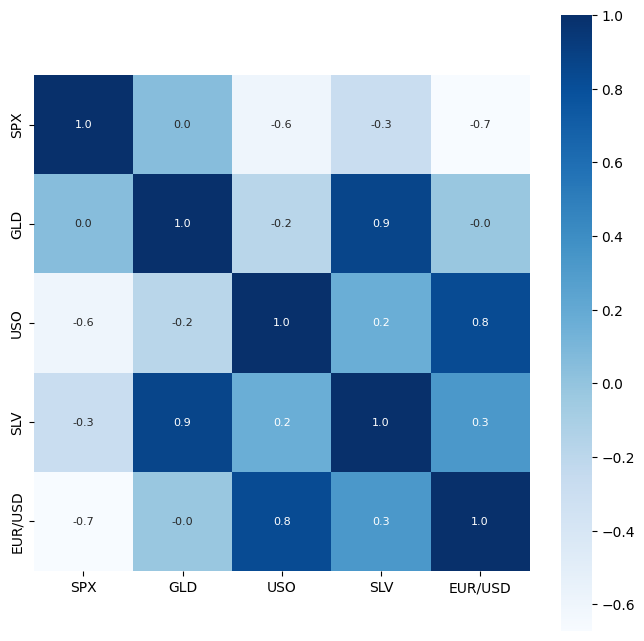

In [18]:
plt.figure(figsize=(8,8))
sn.heatmap(data_correlate, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

C:\Users\USER\AppData\Local\Temp\ipykernel_10520\3442832826.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data_correlation['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

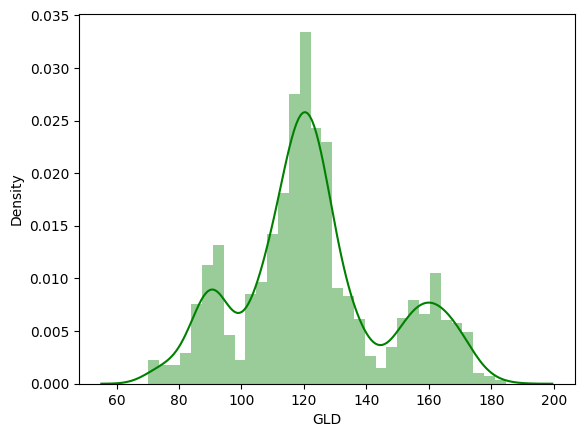

In [19]:
sn.distplot(data_correlation['GLD'], color='green')

In [20]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [21]:
x = data.drop(['GLD', 'Date'], axis=1)
y = data['GLD']

In [22]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 2)

In [25]:
print(x_train.shape, x_test.shape)

(1832, 4) (458, 4)


In [26]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
x_test_predict = regressor.predict(x_test)
print(x_test_predict)

[168.66139967  81.73239996 115.85449985 127.39980079 120.8608014
 154.67439756 150.2292984  126.22370001 117.56149885 125.95000077
 116.84550128 172.03550062 141.54259893 167.72829903 115.22700003
 117.75810056 139.15200351 170.19510103 159.67640343 159.0136002
 155.2017005  125.48600025 175.54509958 156.95370349 125.17860044
  93.99509977  78.01050014 120.72509996 119.06859915 167.46279981
  88.10170047 125.38960019  91.31940072 117.68750025 121.07319901
 136.44220038 115.44820109 115.42020049 148.54729936 107.29140118
 104.34120241  87.19039795 126.51650045 118.01520027 154.7908989
 119.66629993 108.47700004 108.21509774  93.28390029 126.97929816
  74.2247006  113.65399971 121.37340006 111.18139902 118.69829906
 120.84579923 158.93609845 168.87110122 147.34499692  85.79389868
  94.12410049  86.73749853  90.75420014 118.86620072 126.50290069
 127.55850032 169.50329951 122.24709906 117.29809883  98.80650044
 168.23600105 142.92409811 132.17480253 121.14780242 121.0089992
 119.54890063 

In [28]:
error_score = metrics.r2_score(y_test, x_test_predict)
print('R Score Error :', error_score)

R Score Error : 0.9894734845612817


In [29]:
y_test = list(y_test)

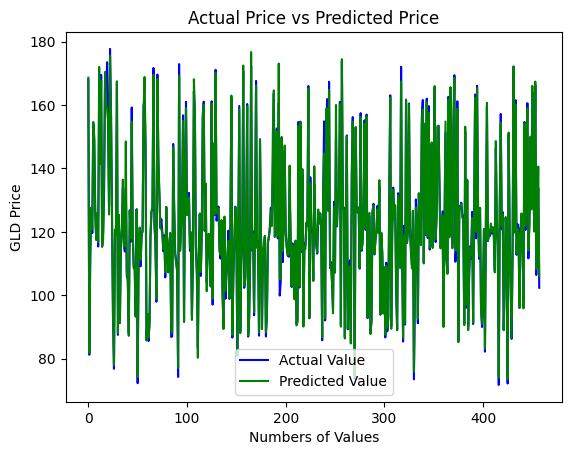

In [36]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(x_test_predict, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Numbers of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()